In [1]:
import numpy as np
import pandas as pd

import os
import glob

import matplotlib.pyplot as plt

from statcast_batter_analysis import Batter,Game,AtBat

In [2]:
#df = pd.read_csv('Data/Teams/Cardinals.csv')
df = pd.read_csv('Data/aggregated-data.csv')

In [3]:
df.shape

(826370, 92)

In [4]:
df = df.rename(columns={'events':'event_result','description':'event'})

In [5]:
excluded_events = ['foul_bunt','missed_bunt','hit_by_pitch','bunt_foul_tip']

In [6]:
df.head()

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         FF  2021-08-27           91.0          -2.21           5.37   
1         FF  2021-08-27           91.5          -2.44           5.25   
2         FF  2021-08-27           90.2          -2.50           5.41   
3         FF  2021-08-27           91.3          -2.50           5.33   
4         FF  2021-08-27           90.2          -2.50           5.31   

       player_name  batter  pitcher event_result          event  ...  \
0  Gregorius, Didi  544369   642203    field_out  hit_into_play  ...   
1  Gregorius, Didi  544369   642203          NaN           ball  ...   
2  Gregorius, Didi  544369   642203          NaN  called_strike  ...   
3   Realmuto, J.T.  592663   642203    field_out  hit_into_play  ...   
4   Realmuto, J.T.  592663   642203          NaN           ball  ...   

   fld_score  post_away_score  post_home_score  post_bat_score  \
0          0                0                2               2   
1          0                0                2               2   
2          0                0                2               2   
3          0                0                2               2   
4          0                0                2               2   

   post_fld_score if_fielding_alignment of_fielding_alignment spin_axis  \
0               0         Infield shift              Standard     220.0   
1               0         Infield shift              Standard     225.0   
2               0         Infield shift              Standard     219.0   
3               0              Standard              Standard     224.0   
4               0              Standard              Standard     219.0   

  delta_home_win_exp delta_run_exp  
0             -0.006        -0.100  
1              0.000         0.014  
2              0.000        -0.019  
3             -0.011        -0.185  
4              0.000         0.025  

[5 rows x 92 columns]

In [7]:
players = df['player_name'].unique()

In [8]:
len(players)

1068

In [9]:
batters = []
for player in players:
    print(player)
    player_df = df[df['player_name']==player]
    print(player_df.shape)
    batter = Batter(player,player_df)
    
    batters.append(batter)

Gregorius, Didi
(2061, 92)
Realmuto, J.T.
(2406, 92)
Harper, Bryce
(2759, 92)
Segura, Jean
(2497, 92)
Herrera, Odúbel
(1429, 92)
Nola, Aaron
(206, 92)
Jankowski, Travis
(596, 92)
Galvis, Freddy
(1734, 92)
Miller, Brad
(1837, 92)
McCutchen, Andrew
(2793, 92)
Bonifacio, Jorge
(387, 92)
Torreyes, Ronald
(894, 92)
Moore, Matt
(78, 92)
Knapp, Andrew
(872, 92)
Williams, Luke
(401, 92)
Wheeler, Zack
(225, 92)
Hoskins, Rhys
(2655, 92)
Suárez, Ranger
(21, 92)
Gibson, Kyle
(53, 92)
Bohm, Alec
(2303, 92)
Moniak, Mickey
(195, 92)
Maton, Nick
(500, 92)
Hammer, JD
(4, 92)
Anderson, Chase
(43, 92)
Neris, Héctor
(3, 92)
Marchan, Rafael
(115, 92)
Velasquez, Vince
(81, 92)
Howard, Spencer
(34, 92)
Eflin, Zach
(128, 92)
Vierling, Matt
(25, 92)
Falter, Bailey
(8, 92)
Joyce, Matt
(840, 92)
Bradley, Archie
(4, 92)
Quinn, Roman
(709, 92)
Kingery, Scott
(543, 92)
Haseley, Adam
(457, 92)
Flores, Wilmer
(2362, 92)
Posey, Buster
(1343, 92)
Ruf, Darin
(1470, 92)
Wade Jr., LaMonte
(1276, 92)
Slater, Austin
(1480, 

Cabrera, Edward
(6, 92)
Alcantara, Sandy
(211, 92)
Neidert, Nick
(48, 92)
Garrett, Braxton
(39, 92)
Marrero, Deven
(52, 92)
Morimando, Shawn
(8, 92)
Panik, Joe
(1365, 92)
Campbell, Paul
(18, 92)
Hess, David
(14, 92)
Díaz, Lewin
(301, 92)
Rogers, Trevor
(126, 92)
Miller, Brian
(22, 92)
Duvall, Adam
(2492, 92)
Wallach, Chad
(481, 92)
Berti, Jon
(1723, 92)
Holloway, Jordan
(43, 92)
Harrison, Monte
(254, 92)
Cooper, Garrett
(1558, 92)
López, Pablo
(125, 92)
Bender, Anthony
(8, 92)
Okert, Steven
(6, 92)
Detwiler, Ross
(15, 92)
Marté, Luis
(28, 92)
Curtiss, John
(16, 92)
Poteet, Cody
(36, 92)
Pop, Zach
(7, 92)
Dickerson, Corey
(2013, 92)
Devers, José
(174, 92)
Cimber, Adam
(9, 92)
Bleier, Richard
(5, 92)
Castano, Daniel
(12, 92)
Bogaerts, Xander
(3060, 92)
Schwarber, Kyle
(2389, 92)
Muñoz, Yairo
(160, 92)
Araúz, Jonathan
(483, 92)
Duran, Jarren
(358, 92)
Vázquez, Christian
(2395, 92)
Dalbec, Bobby
(1819, 92)
Verdugo, Alex
(2876, 92)
Devers, Rafael
(2949, 92)
Arroyo, Christian
(868, 92)
Marti

Díaz, Elias
(1269, 92)
McMahon, Ryan
(2756, 92)
Cron, C.J.
(1900, 92)
Blackmon, Charlie
(2556, 92)
Rodgers, Brendan
(1110, 92)
Joe, Connor
(696, 92)
Freeland, Kyle
(85, 92)
Hilliard, Sam
(1081, 92)
Motter, Taylor
(70, 92)
Gomber, Austin
(118, 92)
Nuñez, Dom
(926, 92)
Story, Trevor
(2876, 92)
Márquez, Germán
(133, 92)
Senzatela, Antonio
(124, 92)
Gray, Jon
(164, 92)
Trejo, Alan
(183, 92)
González, Chi Chi
(114, 92)
Daza, Yonathan
(1096, 92)
Tapia, Raimel
(2387, 92)
Goudeau, Ashton
(4, 92)
Fuentes, Joshua
(1367, 92)
Adams, Matt
(347, 92)
Owings, Chris
(349, 92)
Chacín, Jhoulys
(23, 92)
Almonte, Yency
(8, 92)
Castellani, Ryan
(3, 92)
Moncada, Yoán
(3100, 92)
Jiménez, Eloy
(1190, 92)
Abreu, José
(3129, 92)
Robert, Luis
(1442, 92)
Anderson, Tim
(2553, 92)
García, Leury
(1512, 92)
Vaughn, Andrew
(1584, 92)
Grandal, Yasmani
(2031, 92)
Lamb, Jake
(956, 92)
Zavala, Seby
(369, 92)
Goodwin, Brian
(1640, 92)
Collins, Zack
(942, 92)
Mendick, Danny
(1187, 92)
Engel, Adam
(806, 92)
Cease, Dylan
(20, 

Santana, Domingo
(330, 92)
Taylor, Beau
(103, 92)
Rodríguez, Sean
(50, 92)
Alvarez, Eddy
(167, 92)
Navarreto, Brian
(15, 92)
Forsythe, Logan
(150, 92)
Cervelli, Francisco
(220, 92)
Lin, Tzu-Wei
(221, 92)
Puello, César
(35, 92)
Grullón, Deivy
(20, 92)
Kratz, Erik
(118, 92)
Canó, Robinson
(605, 92)
Cordell, Ryan
(33, 92)
Dozier, Brian
(50, 92)
Céspedes, Yoenis
(135, 92)
Núñez, Eduardo
(4, 92)
Huff, Sam
(139, 92)
Dietrich, Derek
(304, 92)
Choo, Shin-Soo
(523, 92)
Apostel, Sherten
(92, 92)
Rivera, Yadiel
(19, 92)
Garcia, Greg
(289, 92)
Hill, Tim
(3, 92)
Adams, Austin
(3, 92)
Oña, Jorge
(64, 92)
Davis, Chris
(219, 92)
Herrera, Dilson
(34, 92)
Smith Jr., Dwight
(287, 92)
Wieters, Matt
(184, 92)
Ravelo, Rangel
(159, 92)
Cron, Kevin
(82, 92)
Flowers, Tyler
(328, 92)
Markakis, Nick
(550, 92)
Hechavarría, Adeiny
(229, 92)
Murphy, Daniel
(487, 92)
Kemp, Matt
(547, 92)
Encarnación, Edwin
(791, 92)
Sánchez, Yolmer
(99, 92)
Goins, Ryan
(40, 92)
Delmonico, Nicky
(96, 92)
Cuthbert, Cheslor
(3, 92)
Kip

In [10]:
def sortFunc(x):
    return x.data.shape[0]

batters.sort(reverse=True,key=sortFunc)

In [11]:
for batter in batters:
    #print(batter)
    batter.isStrike()
    batter.isSwing()
    batter.isCorrectDecision()
    batter.analyze_pitch_location()

/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['plate_z'] >= self.sz_btm) & (self.data['plate_z'] <= self.sz_top)
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['event']=='swinging_strike') | (self.data['event']=='swinging_strike_blocked')
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:209: Se

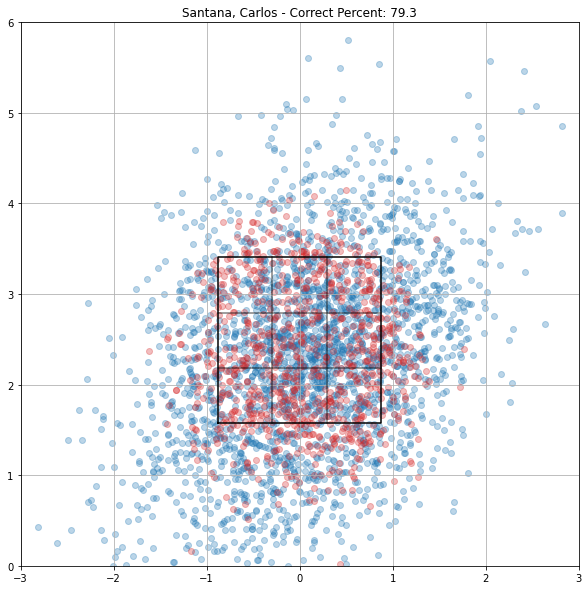

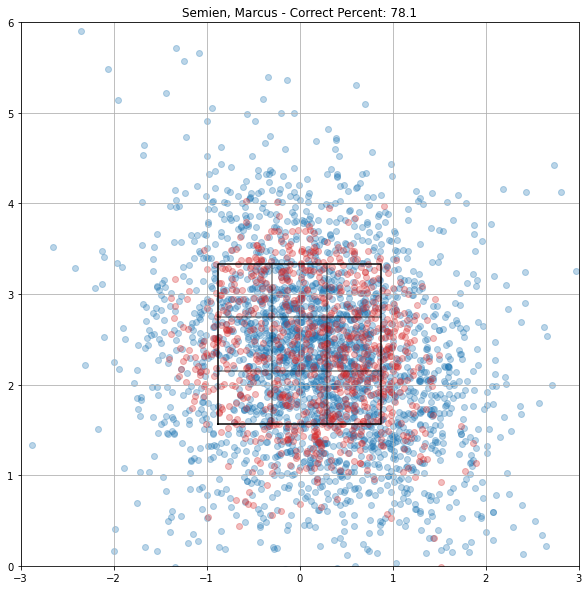

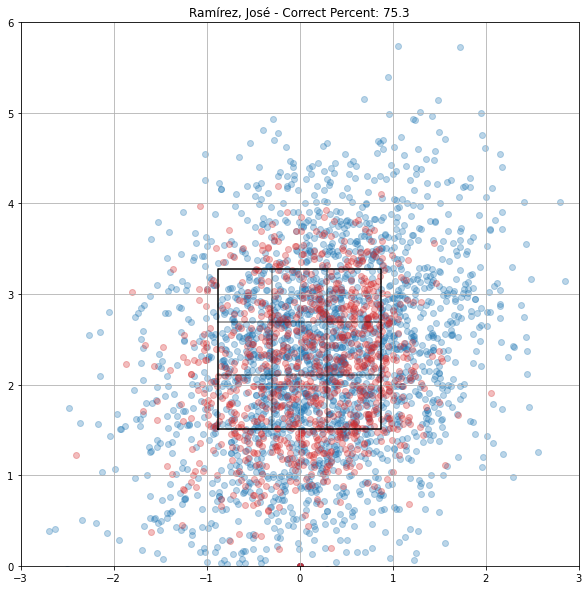

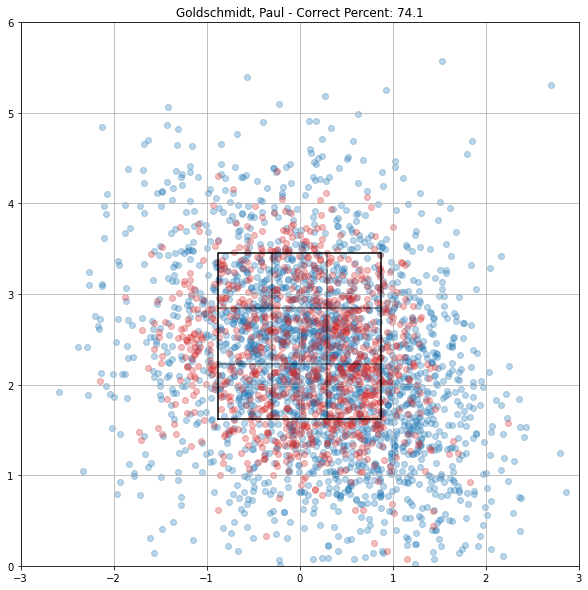

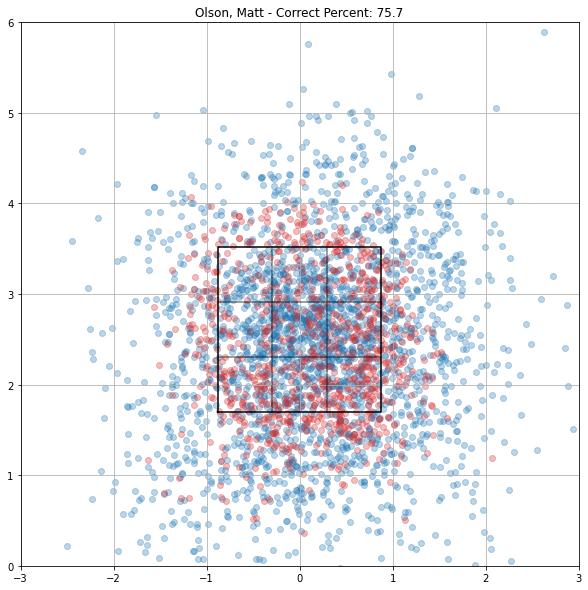

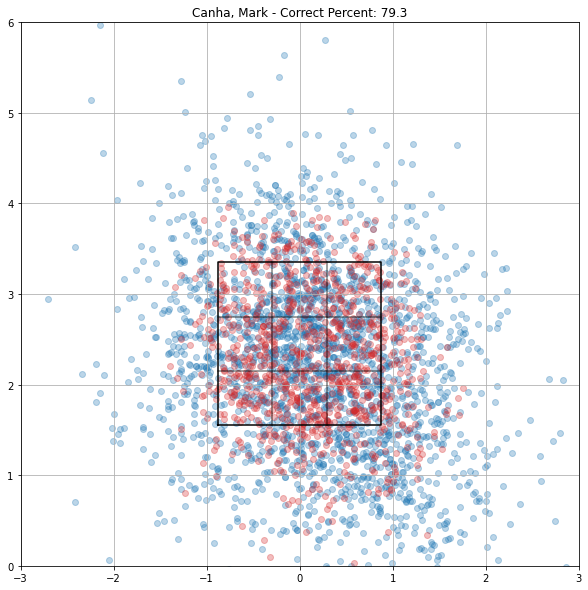

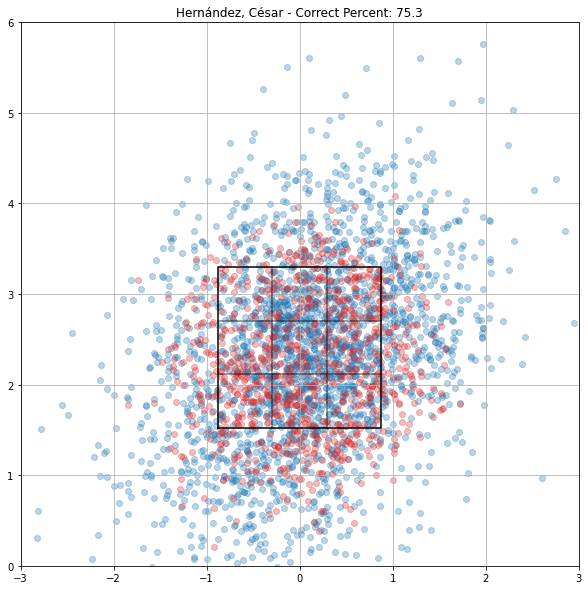

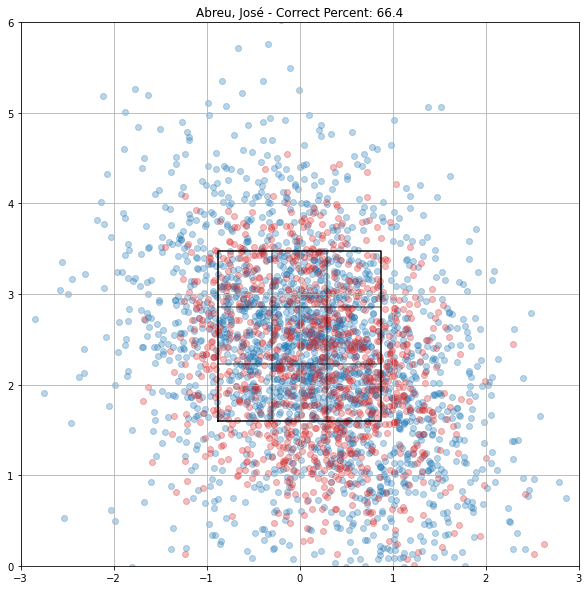

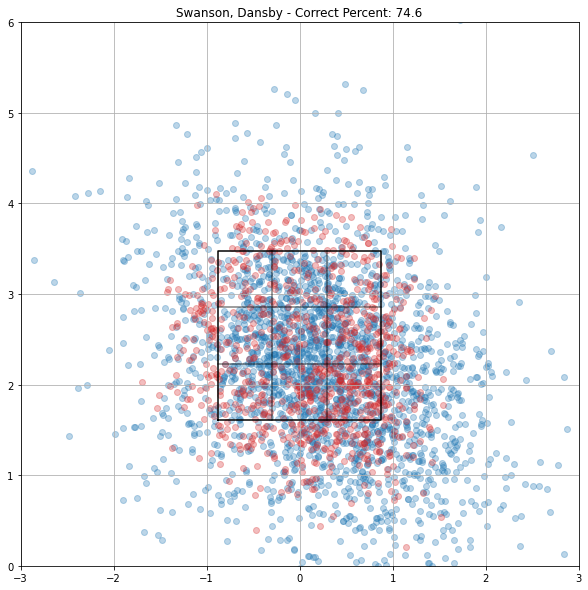

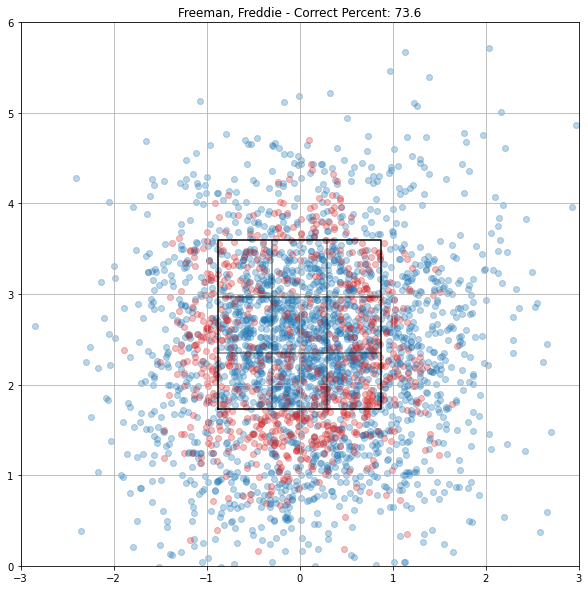

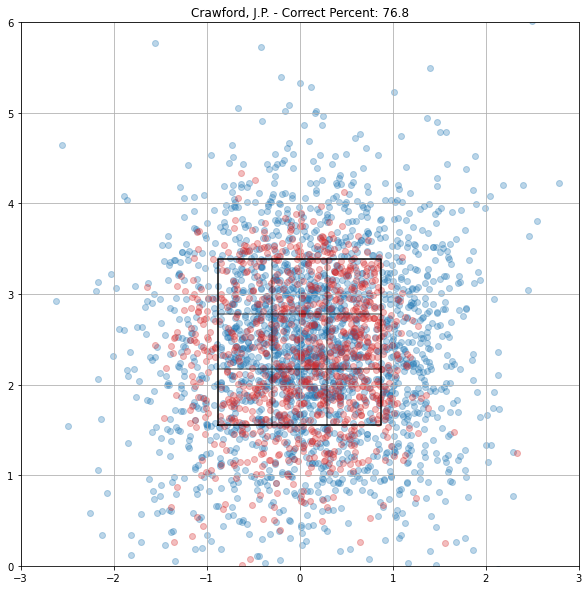

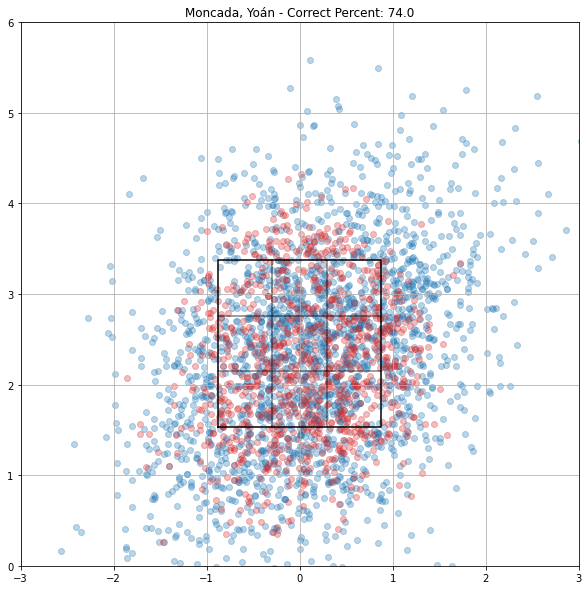

In [12]:
for batter in batters[:12]:
    
    BL = (batter.sz_left,batter.sz_btm)
    TL = (batter.sz_left,batter.sz_top)
    TR = (batter.sz_right,batter.sz_top)
    BR = (batter.sz_right,batter.sz_btm)
    
    batter_correct = batter.data[batter.data['isCorrectDecision']==True]
    batter_incorrect = batter.data[batter.data['isCorrectDecision']==False]
    
    not_strike_df = batter.data[batter.data['isStrike']==False]
    
    correct_count = not_strike_df['isCorrectDecision'].value_counts()[True]
    incorrect_count = not_strike_df['isCorrectDecision'].value_counts()[False]
    
    correct_percent = (correct_count / not_strike_df.shape[0] * 100).round(1)
    
    fig,ax = plt.subplots(figsize=(10,10))
    
    ax.set_title(f'{batter} - Correct Percent: {correct_percent}')

    x = [it[0] for it in (BL,TL,TR,BR,BL)]
    y = [it[1] for it in (BL,TL,TR,BR,BL)]

    ax.plot(x,y,color='k')

    ax.plot([batter.sz_left,batter.sz_right],[batter.sz_mid_btm,batter.sz_mid_btm],color='k',alpha=.5)
    ax.plot([batter.sz_left,batter.sz_right],[batter.sz_mid_top,batter.sz_mid_top],color='k',alpha=.5)

    ax.plot([batter.sz_mid_left,batter.sz_mid_left],[batter.sz_top,batter.sz_btm],color='k',alpha=.5)
    ax.plot([batter.sz_mid_right,batter.sz_mid_right],[batter.sz_top,batter.sz_btm],color='k',alpha=.5)

    ax.scatter(batter_correct['norm_plate_x'],batter_correct['plate_z'],color='tab:blue',alpha=.3)
    ax.scatter(batter_incorrect['norm_plate_x'],batter_incorrect['plate_z'],color='tab:red',alpha=.3)

    ax.grid()

    ax.set_xlim(-3,3)
    ax.set_ylim(0,6)
    plt.show()

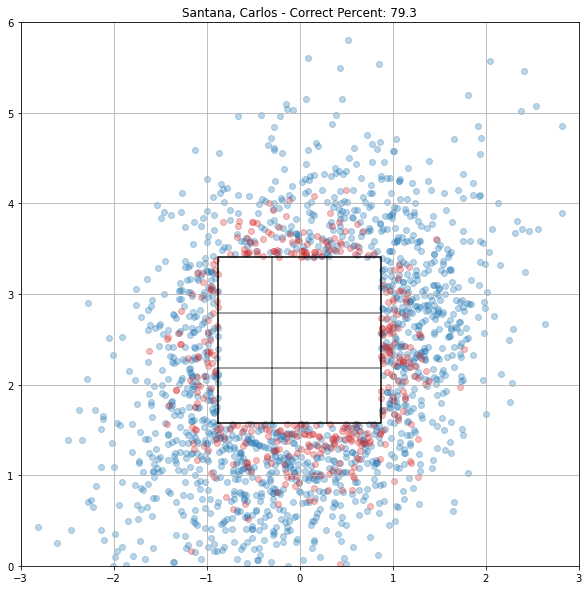

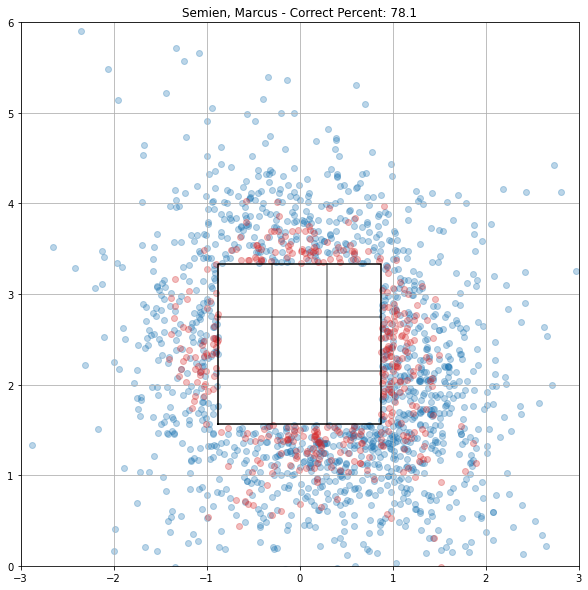

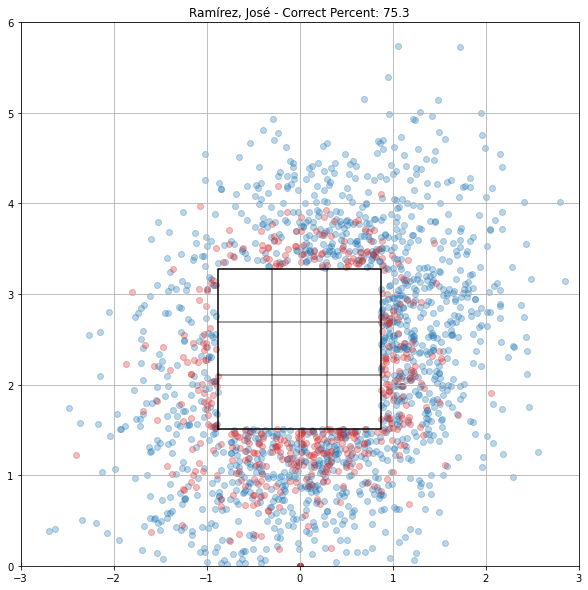

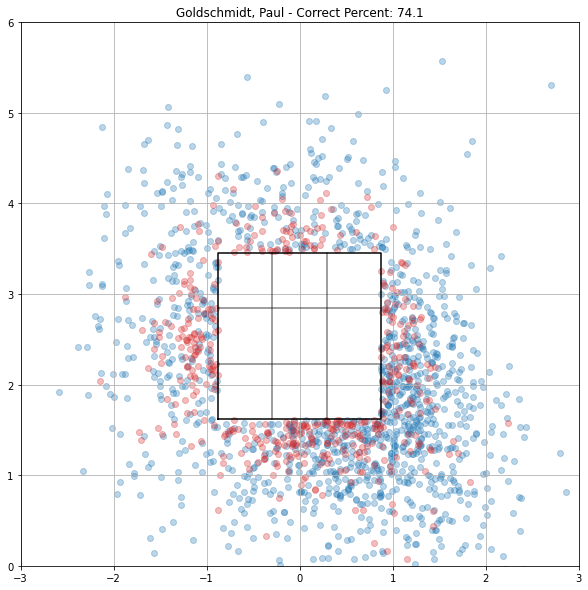

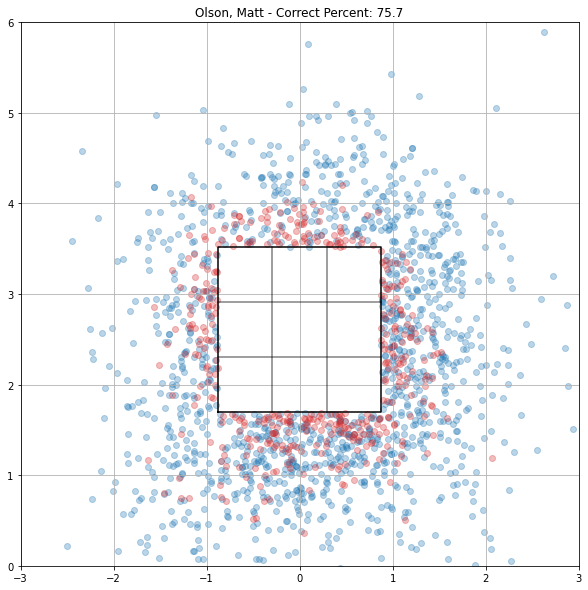

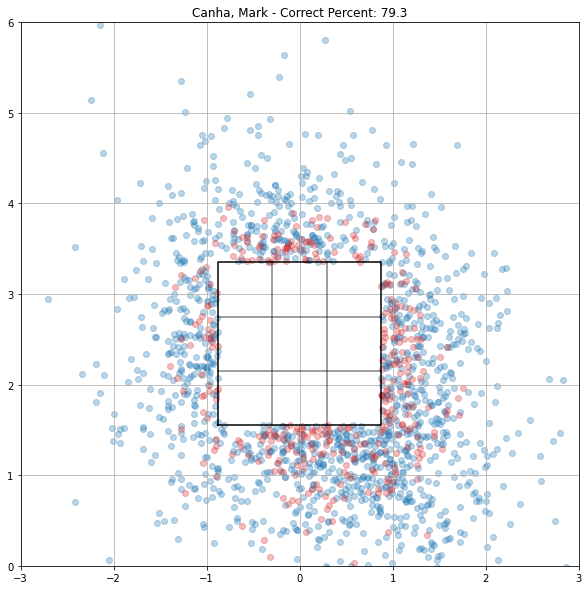

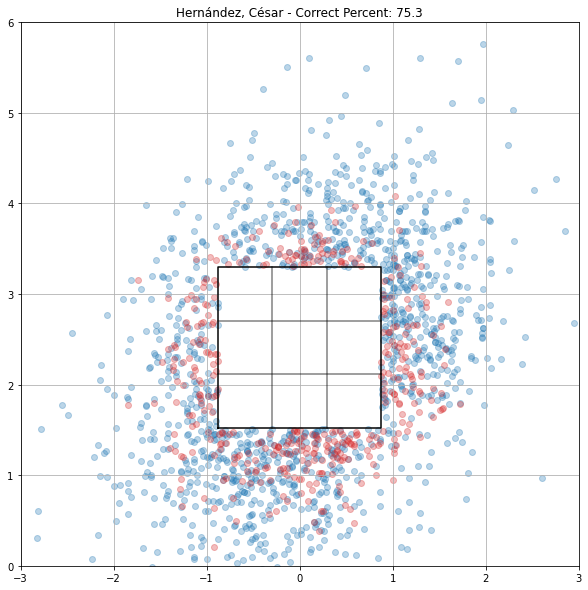

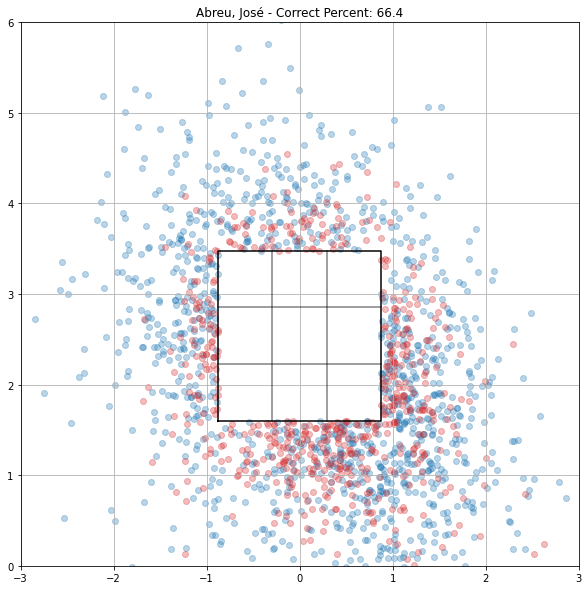

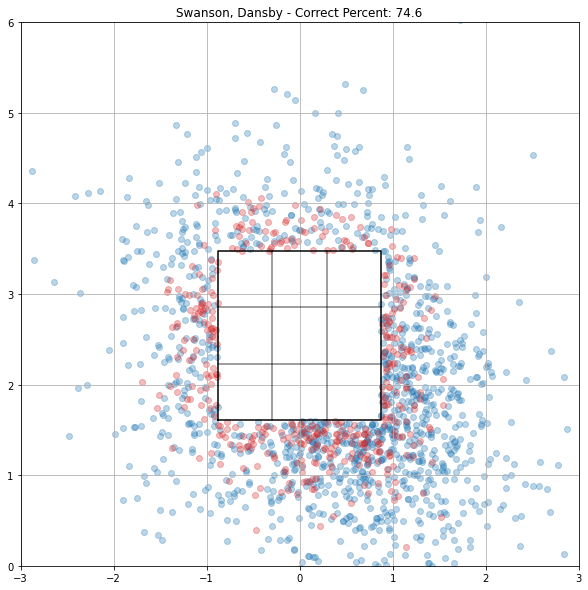

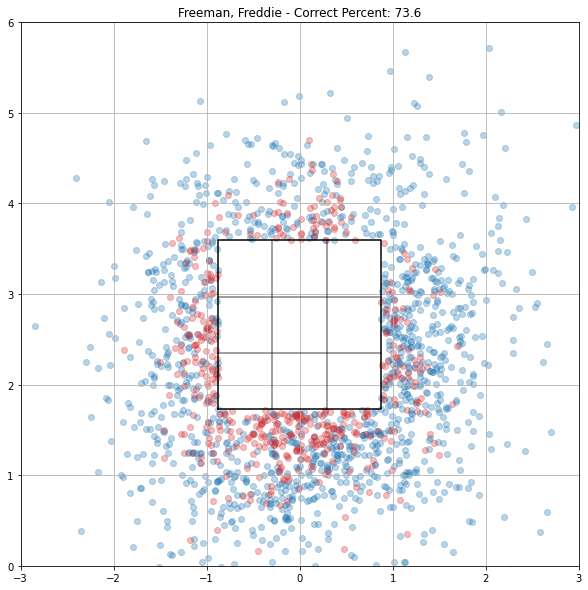

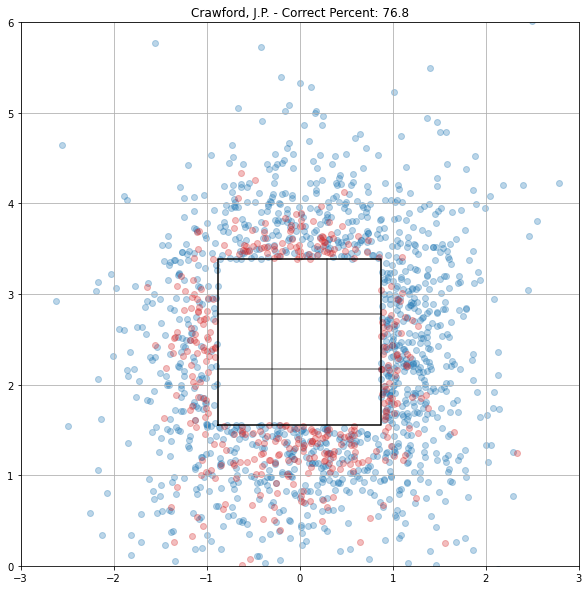

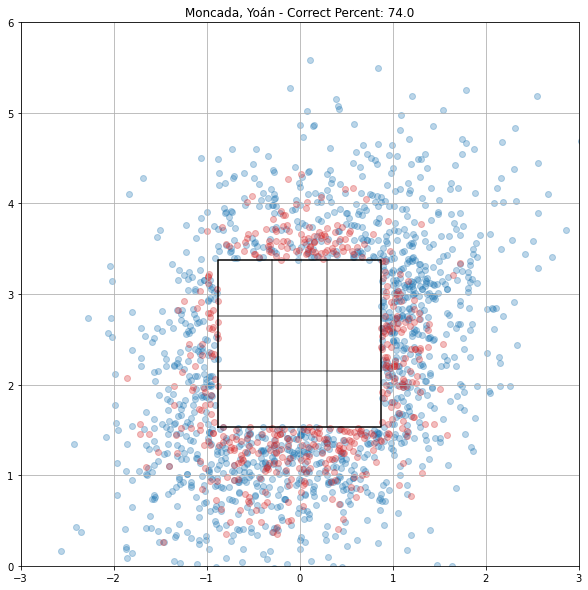

In [13]:
for batter in batters[:12]:
    
    BL = (batter.sz_left,batter.sz_btm)
    TL = (batter.sz_left,batter.sz_top)
    TR = (batter.sz_right,batter.sz_top)
    BR = (batter.sz_right,batter.sz_btm)
    
    not_strike_df = batter.data[batter.data['isStrike']==False]
    
    batter_correct = not_strike_df[not_strike_df['isCorrectDecision']==True]
    batter_incorrect = not_strike_df[not_strike_df['isCorrectDecision']==False]
    
    correct_count = not_strike_df['isCorrectDecision'].value_counts()[True]
    incorrect_count = not_strike_df['isCorrectDecision'].value_counts()[False]
    
    correct_percent = (correct_count / not_strike_df.shape[0] * 100).round(1)
    
    fig,ax = plt.subplots(figsize=(10,10))
    
    ax.set_title(f'{batter} - Correct Percent: {correct_percent}')

    x = [it[0] for it in (BL,TL,TR,BR,BL)]
    y = [it[1] for it in (BL,TL,TR,BR,BL)]

    ax.plot(x,y,color='k')

    ax.plot([batter.sz_left,batter.sz_right],[batter.sz_mid_btm,batter.sz_mid_btm],color='k',alpha=.5)
    ax.plot([batter.sz_left,batter.sz_right],[batter.sz_mid_top,batter.sz_mid_top],color='k',alpha=.5)

    ax.plot([batter.sz_mid_left,batter.sz_mid_left],[batter.sz_top,batter.sz_btm],color='k',alpha=.5)
    ax.plot([batter.sz_mid_right,batter.sz_mid_right],[batter.sz_top,batter.sz_btm],color='k',alpha=.5)

    ax.scatter(batter_correct['norm_plate_x'],batter_correct['plate_z'],color='tab:blue',alpha=.3)
    ax.scatter(batter_incorrect['norm_plate_x'],batter_incorrect['plate_z'],color='tab:red',alpha=.3)

    ax.grid()

    ax.set_xlim(-3,3)
    ax.set_ylim(0,6)
    plt.show()

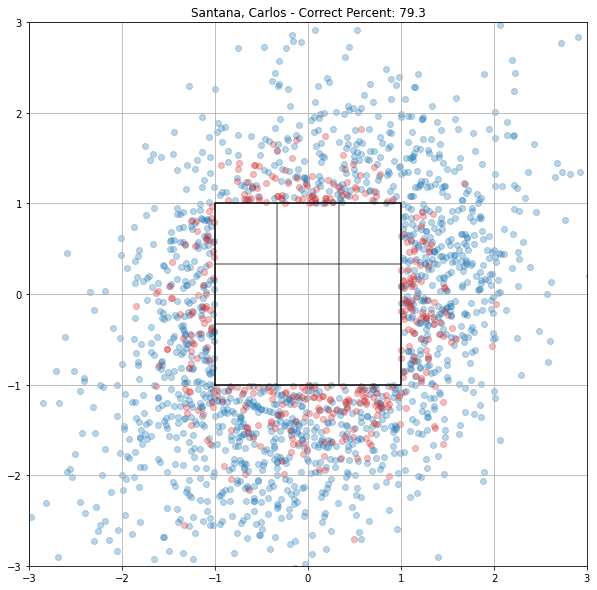

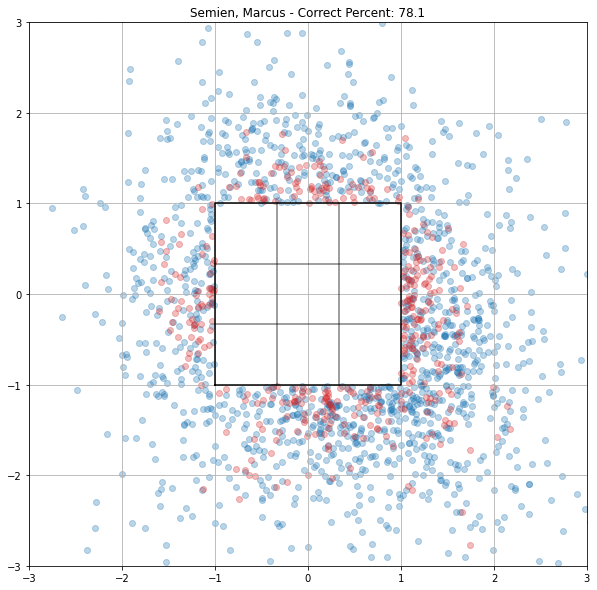

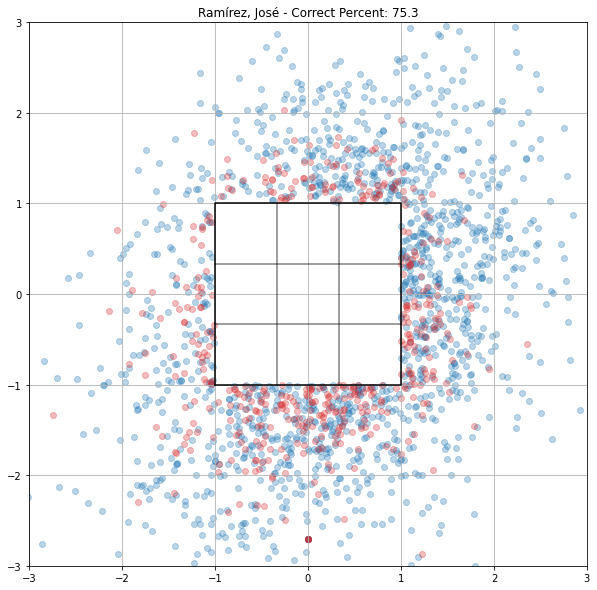

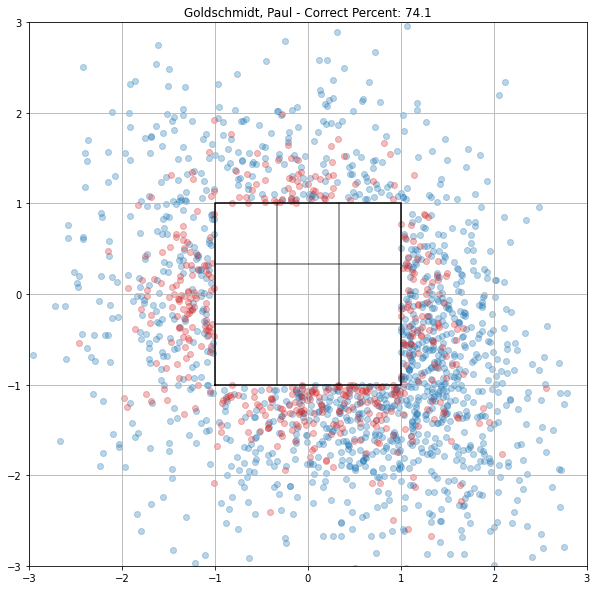

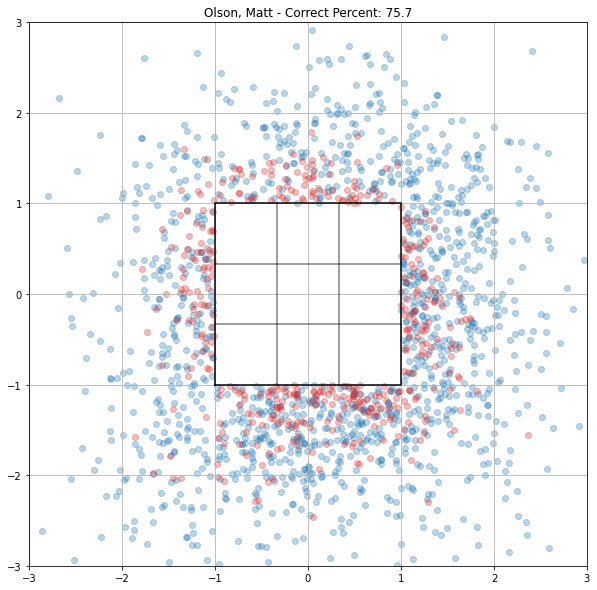

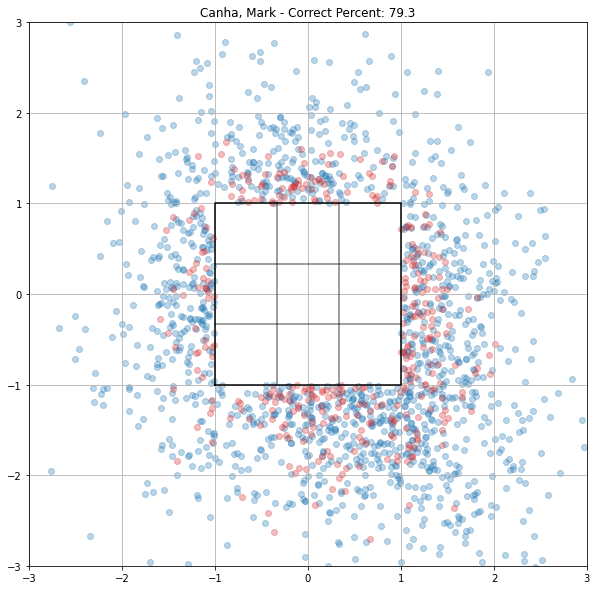

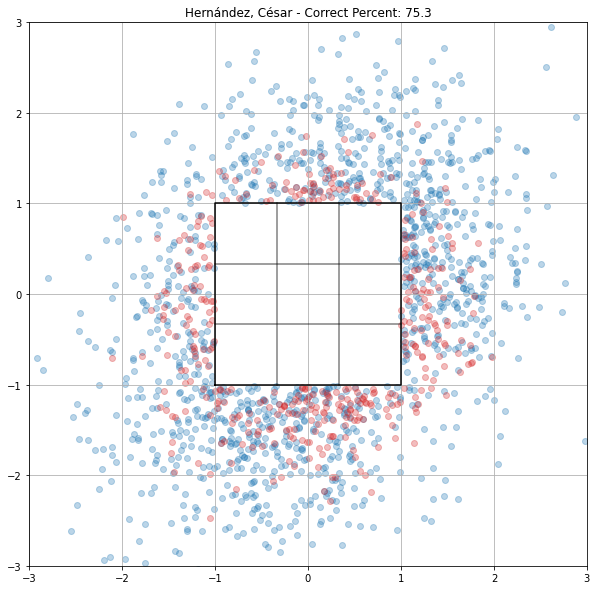

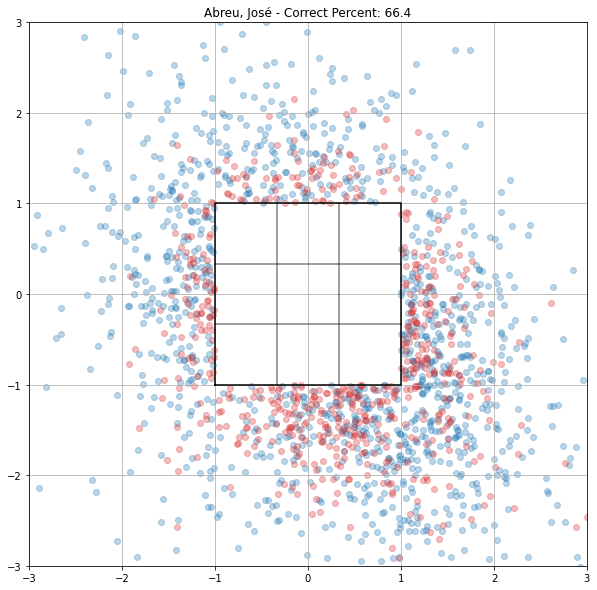

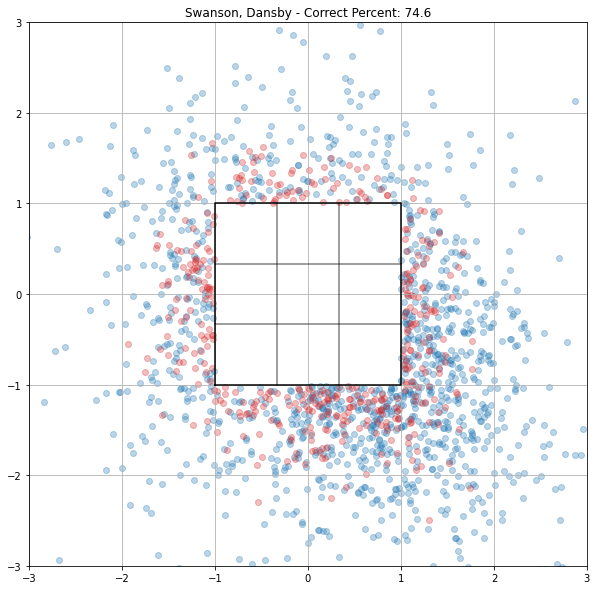

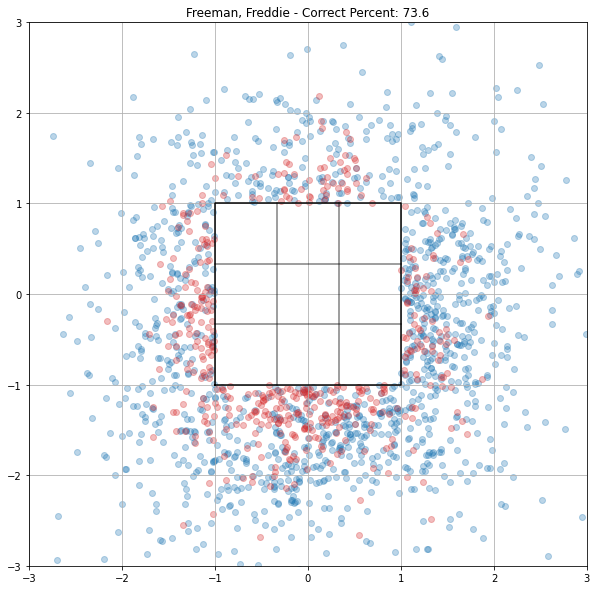

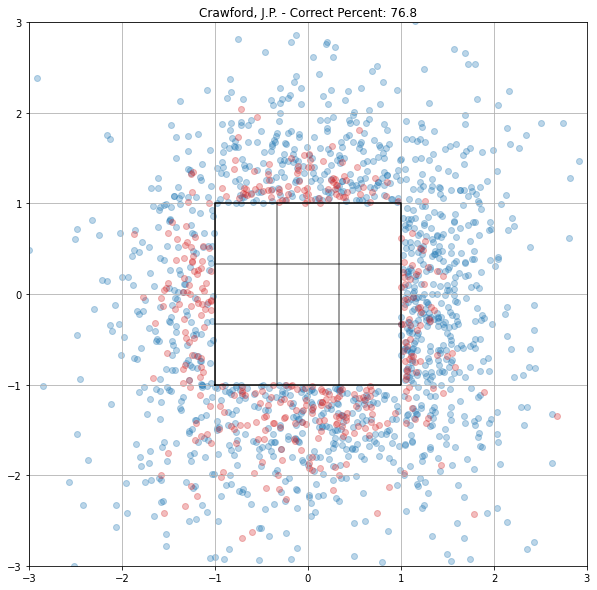

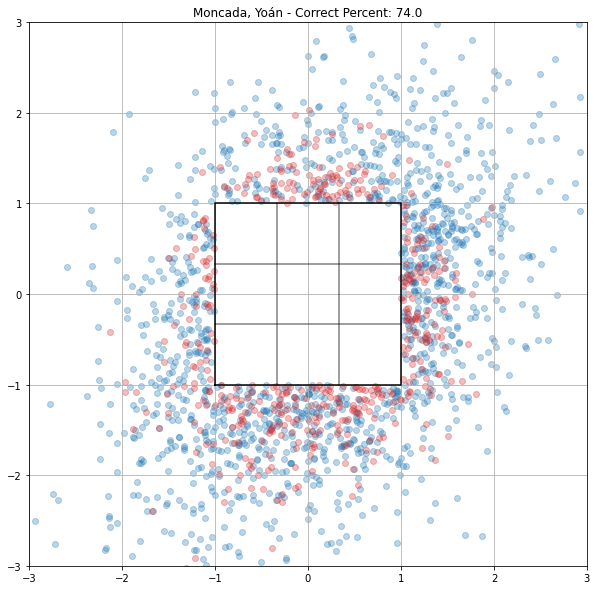

In [14]:
for batter in batters[:12]:
    
    BL = (-1,-1)
    TL = (-1,1)
    TR = (1,1)
    BR = (1,-1)
    
    not_strike_df = batter.data[batter.data['isStrike']==False]
    
    batter_correct = not_strike_df[not_strike_df['isCorrectDecision']==True]
    batter_incorrect = not_strike_df[not_strike_df['isCorrectDecision']==False]
    
    correct_count = not_strike_df['isCorrectDecision'].value_counts()[True]
    incorrect_count = not_strike_df['isCorrectDecision'].value_counts()[False]
    
    correct_percent = (correct_count / not_strike_df.shape[0] * 100).round(1)
    
    fig,ax = plt.subplots(figsize=(10,10))
    
    ax.set_title(f'{batter} - Correct Percent: {correct_percent}')

    x = [it[0] for it in (BL,TL,TR,BR,BL)]
    y = [it[1] for it in (BL,TL,TR,BR,BL)]

    ax.plot(x,y,color='k')

    # Horizontals
    ax.plot([-1,1],[0.333,0.333],color='k',alpha=.5)
    ax.plot([-1,1],[-0.333,0.-.333],color='k',alpha=.5)

    # Verticals
    ax.plot([-0.333,-0.333],[1,-1],color='k',alpha=.5)
    ax.plot([0.333,0.333],[1,-1],color='k',alpha=.5)

    ax.scatter(batter_correct['prop_plate_x'],batter_correct['prop_plate_z'],color='tab:blue',alpha=.3)
    ax.scatter(batter_incorrect['prop_plate_x'],batter_incorrect['prop_plate_z'],color='tab:red',alpha=.3)

    ax.grid()

    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    plt.show()

In [15]:
_dfs = []
for batter in batters:
    _df = batter.data
    _dfs.append(_df)

In [16]:
merged_df = pd.concat(_dfs)

In [17]:
incorrect_df = merged_df[(merged_df['isCorrectDecision']==False)]

In [18]:
outside_df = merged_df[merged_df['isStrike']==False]

In [19]:
incorrect_outside_df = merged_df[(merged_df['isCorrectDecision']==False) & (merged_df['isStrike']==False)]

In [20]:
incorrect_df.shape

(258278, 106)

In [21]:
incorrect_outside_df.shape

(126664, 106)

In [22]:
outside_df.shape

(443594, 106)

In [23]:
incorrect_df.keys()

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'event_result',
       'event',
       ...
       'horiz_dist_to_edge', 'dist_to_top', 'dist_to_btm', 'vert_dist_to_edge',
       'dist_to_inside', 'dist_to_outside', 'dist_to_zone', 'prop_plate_x',
       'prop_plate_z', 'norm_plate_x'],
      dtype='object', length=106)

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


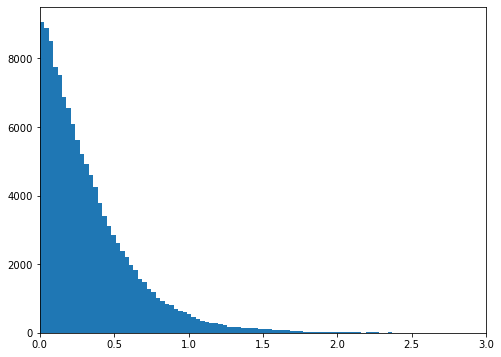

In [24]:
fig,ax = plt.subplots(figsize=(8,6))

incorrect_outside_counts, bins, _ = ax.hist(incorrect_outside_df['dist_to_zone'].values,bins=100,range=(0,3))

ax.set_xlim(0,3)

plt.show()

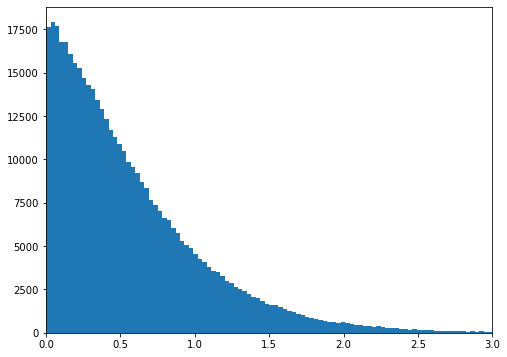

In [25]:
fig,ax = plt.subplots(figsize=(8,6))

outside_counts, bins, _ = ax.hist(outside_df['dist_to_zone'].values,bins=100,range=(0,3))

ax.set_xlim(0,3)

plt.show()

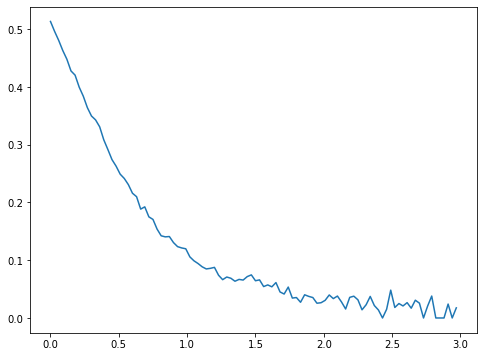

In [26]:
fig,ax = plt.subplots(figsize=(8,6))

ax.plot(bins[:-1],incorrect_outside_counts/outside_counts)

plt.show()

In [27]:
x = np.arange(-3,3.01,.1).round(2)

In [28]:
z = np.arange(3,-3.01,-.1).round(2)

In [29]:
rows = []
for i in np.arange(len(z)-1):
    row = []
    for j in np.arange(len(x)-1):
        _df = merged_df[(merged_df['prop_plate_z'] < z[i]) & (merged_df['prop_plate_z'] >= z[i+1]) & (
            merged_df['prop_plate_x'] > x[j]) & (merged_df['prop_plate_x'] <= x[j+1])]
        
        isCorrectDecision = (_df['isCorrectDecision'].values).astype(int)
        if len(isCorrectDecision) == 0:
            row.append(1)
        else:
            correct_percent = sum(isCorrectDecision) / len(isCorrectDecision)
            row.append(correct_percent)
    rows.append(row)
rows=np.array(rows)

In [30]:
rows=np.array(rows)

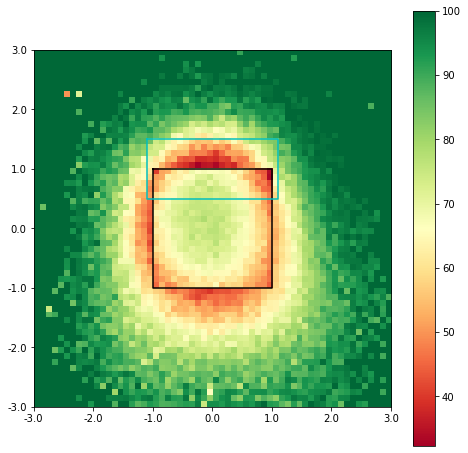

In [31]:
fig,ax = plt.subplots(figsize=(8,8))

hm = ax.imshow(rows*100,cmap='RdYlGn')
ax.plot([19.5,19.5,39.5,39.5,19.5],[19.5,39.5,39.5,19.5,19.5],color='k')

ax.plot([18.5,18.5,40.5,40.5,18.5],[14.5,24.5,24.5,14.5,14.5],color='c')

axmin = -.5
axmax = 59.5

axticks = np.arange(axmin,axmax+.1,10)
xlabels = np.arange(-3,3.01,1)
zlabels = np.arange(3,-3.01,-1)

ax.set_xticks(axticks)
ax.set_yticks(axticks)

ax.set_xticklabels(xlabels)
ax.set_yticklabels(zlabels)

fig.colorbar(hm)

plt.show()